To begin copy this notebook to your own drive:

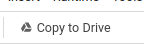


### Submission Instructions:
1. **Restart the kernel** (in the menubar, select Runtime$\rightarrow$Restart runtime)
2. **Download the notebook** (in the menubar, select File$\rightarrow$Download .ipynb)
3. **Upload the downloaded notebook (.ipynb file) to your repository**.


Make sure you fill in any place that says `YOUR CODE HERE`, and that no tests fail.  

Note: To use a GPU, do the following: Runtime$\rightarrow$Change runtime type$\rightarrow$ GPU

**Acknowledgements**: This notebook was writen with the help of the following
[turturial](https://towardsdatascience.com/understanding-topic-coherence-measures-4aa41339634c)


In [ ]:
! pip install datasets
! pip install bertopic
! pip install --upgrade gensim


# Loading 20_newsgroups dataset:

In [ ]:
from datasets import load_dataset
# YOUR CODE HERE: fill which dataset (from HuggingFace hub) to use
hf_ds = "SetFit/20_newsgroups"
# END
newsgroups_dataset = load_dataset(hf_ds)

Repo card metadata block was not found. Setting CardData to empty.


Generating train split:   0%|          | 0/11314 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7532 [00:00<?, ? examples/s]

In [ ]:
newsgroups_dataset['test']

Dataset({
    features: ['text', 'label', 'label_text'],
    num_rows: 7532
})

In [ ]:
# Lets look on example from the dataset:
next(iter(newsgroups_dataset['test']))

{'text': 'I am a little confused on all of the models of the 88-89 bonnevilles.\nI have heard of the LE SE LSE SSE SSEI. Could someone tell me the\ndifferences are far as features or performance. I am also curious to\nknow what the book value is for prefereably the 89 model. And how much\nless than book value can you usually get them for. In other words how\nmuch are they in demand this time of year. I have heard that the mid-spring\nearly summer is the best time to buy.',
 'label': 7,
 'label_text': 'rec.autos'}

## Loading BERTopic model

TODO: This part should be done by them, write some general insterction, and tell them to polt topic info, and to create a model_topics variable which contain the list of topics (list of list of strs). Also ask them what k (number of words in topic) the model that they use have.

In [ ]:
from bertopic import BERTopic
# YOUR CODE HERE: fill model (from HuggingFace hub) to use
hf_model = "alexman83/BERTopic_20newsgroups_base"
# END

topic_model = BERTopic.load(hf_model)
topic_info = topic_model.get_topic_info()
topic_info
# Note from BERTopic doc: Topic number -1 refers to all outliers and should typically be ignored. Next, let's take a look at the most frequent topic that was generated

topics.json:   0%|          | 0.00/319k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

topic_embeddings.safetensors:   0%|          | 0.00/344k [00:00<?, ?B/s]

ctfidf_config.json:   0%|          | 0.00/4.01M [00:00<?, ?B/s]

ctfidf.safetensors:   0%|          | 0.00/6.88M [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

,Topic,Count,Name,Representation,Representative_Docs
0,-1,6636,-1_to_the_and_of,"[to, the, and, of, is, you, in, for, it, that]",NaN
1,0,1820,0_game_team_games_he,"[game, team, games, he, players, season, hocke...",NaN
2,1,584,1_key_clipper_chip_encryption,"[key, clipper, chip, encryption, keys, escrow,...",NaN
3,2,527,2_ites_cheek_yep_huh,"[ites, cheek, yep, huh, eh, ken, auto, ignore,...",NaN
4,3,434,3_drive_scsi_drives_ide,"[drive, scsi, drives, ide, disk, controller, h...",NaN
...,...,...,...,...,...
219,218,11,218_xxxxx_detector_ir_selspot,"[xxxxx, detector, ir, selspot, position, dance...",NaN
220,219,10,219_weight_fat_muscle_adiposity,"[weight, fat, muscle, adiposity, dieting, rebo...",NaN
221,220,10,220_8177_techniciandr_student_dod,"[8177, techniciandr, student, dod, indiscretio...",NaN
222,221,10,221_multicolumn_motif_widget_widgets,"[multicolumn, motif, widget, widgets, list, xt...",NaN


In [ ]:
model_topics = topic_info['Representation'].to_list()

# Evaluation using Gensim

In [ ]:
import re
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim.corpora.dictionary import Dictionary

tokenizer = lambda s: re.findall( '[\w\d]+', s.lower() )
texts = [tokenizer(s['text']) for s in newsgroups_dataset['test']]

word2id = Dictionary(texts)


In [ ]:
# YOUR CODE HERE: fill which metric to use (supported according to CoherenceModel documentation):
coherence_metrice_1 = 'c_v'
coherence_metrice_2 = 'u_mass'

# END

In [ ]:
cm_1 = CoherenceModel(topics = model_topics, texts=texts,  dictionary=word2id, coherence=coherence_metrice_1)
print(f"{coherence_metrice_1}: {round(cm_1.get_coherence(), 2)}")
cm_2 = CoherenceModel(topics = model_topics, texts=texts,  dictionary=word2id, coherence=coherence_metrice_2)
print(f"{coherence_metrice_2}: {round(cm_2.get_coherence(), 2)}")


c_v: 0.53
u_mass: -6.49
